### **US Baby Nams 1880 - 2010**

##### The united States Social Security Administraion (SSA) has made available data on the frequency of baby names form 1880 through the present.

In [19]:
import pandas as pd
import numpy as np

dat = pd.read_csv('../../CSV Files/NationalNames.csv')

data = dat.head(20).drop(['Id'], axis = 1)

In [20]:
# Replacing the name of column

data.rename(columns={'Count': 'birth'}, inplace=True)

data.head()

,Name,Year,Gender,birth
0,Mary,1880,F,7065
1,Anna,1880,F,2604
2,Emma,1880,F,2003
3,Elizabeth,1880,F,1939
4,Minnie,1880,F,1746


> There are many things you might want to do with the data set:
1. Visualize the proportion of babies given a particular name (your own, or another name) over time.
2. Determine the relative rank of a name.
3. Determine the most popular names in each year or the names with largest increasesor decreases.
3. Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters
4. Analyze external sources of trends: biblical names, celebrities, demographic changes

##### By using the dataset yob1880.txt

In [21]:
names = pd.read_csv('../../CSV Files/yob1880.txt', names=['name', 'sex', 'births'])

names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    2000 non-null   object
 1   sex     2000 non-null   object
 2   births  2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [22]:
# Totle number of births by sex

total_births = names.groupby('sex')

total_births.births

total_births.sum()

,births
sex,
F,90994
M,110490


##### Since the data set is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field. This is easy to do using pandas.concat:

In [23]:
# 2010 is the last year available

years = range(1880, 2011)

In [24]:
pieces = []

columns = ['name', 'sex', 'births']

In [25]:
for year in years:
    path = '../../CSV Files/New Folder/yob%i.txt' % year
    frame = pd.read_csv(path, names = columns)


    frame['year'] = year
    pieces.append(frame)

In [26]:
# Concatenate every thing into a single DataFrame

names = pd.concat(pieces, ignore_index=True)

names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [27]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692396 entries, 0 to 1692395
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   sex     object
 2   births  int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


In [28]:
total_births = names.pivot_table('births', index= 'year', columns= 'sex', aggfunc= sum)


total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442
...,...,...
2006,1900375,2054352
2007,1921655,2074427
2008,1889800,2038995


<AxesSubplot:title={'center':'total births by sex and year'}, xlabel='year'>

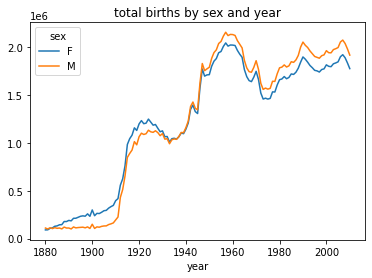

In [29]:
total_births.plot(title = 'total births by sex and year')

In [30]:
def add_prop(group):
 # Integer division floors
 births = group.births.astype(float)
 group['prop'] = births / births.sum()
 return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [31]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692396 entries, 0 to 1692395
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   name    object 
 1   sex     object 
 2   births  int64  
 3   year    int64  
 4   prop    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 77.5+ MB


In [32]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [33]:
def get_top1000(group):
 return group.sort_index(by='births', ascending=False)[:1000]
 grouped = names.groupby(['year', 'sex'])
 top1000 = grouped.apply(get_top1000)

In [34]:
ieces = []
for year, group in names.groupby(['year', 'sex']):
 pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [35]:
top1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954272 entries, 0 to 1954271
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   name    object 
 1   sex     object 
 2   births  int64  
 3   year    int64  
 4   prop    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 74.5+ MB


### Analyzing Naming Trends

##### Splitting the Top 1000 names into the boy and girl protions is easy to do:

In [37]:
boys = top1000[top1000.sex == 'M']

boys

,name,sex,births,year,prop
942,John,M,9655,1880,NaN
943,William,M,9532,1880,NaN
944,James,M,5927,1880,NaN
945,Charles,M,5348,1880,NaN
946,George,M,5126,1880,NaN
...,...,...,...,...,...
1954267,Bailey,M,196,2010,0.000102
1954268,Destin,M,196,2010,0.000102
1954269,Eliezer,M,196,2010,0.000102
1954270,Enoch,M,196,2010,0.000102


In [38]:
girls = top1000[top1000.sex == 'F']

girls

,name,sex,births,year,prop
0,Mary,F,7065,1880,NaN
1,Anna,F,2604,1880,NaN
2,Emma,F,2003,1880,NaN
3,Elizabeth,F,1939,1880,NaN
4,Minnie,F,1746,1880,NaN
...,...,...,...,...,...
1953267,Alaysia,F,252,2010,0.000142
1953268,Aleigha,F,252,2010,0.000142
1953269,Savanah,F,252,2010,0.000142
1953270,Sky,F,252,2010,0.000142


In [39]:
total_births = top1000.pivot_table('births', index= 'year', columns= 'name', aggfunc= sum)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

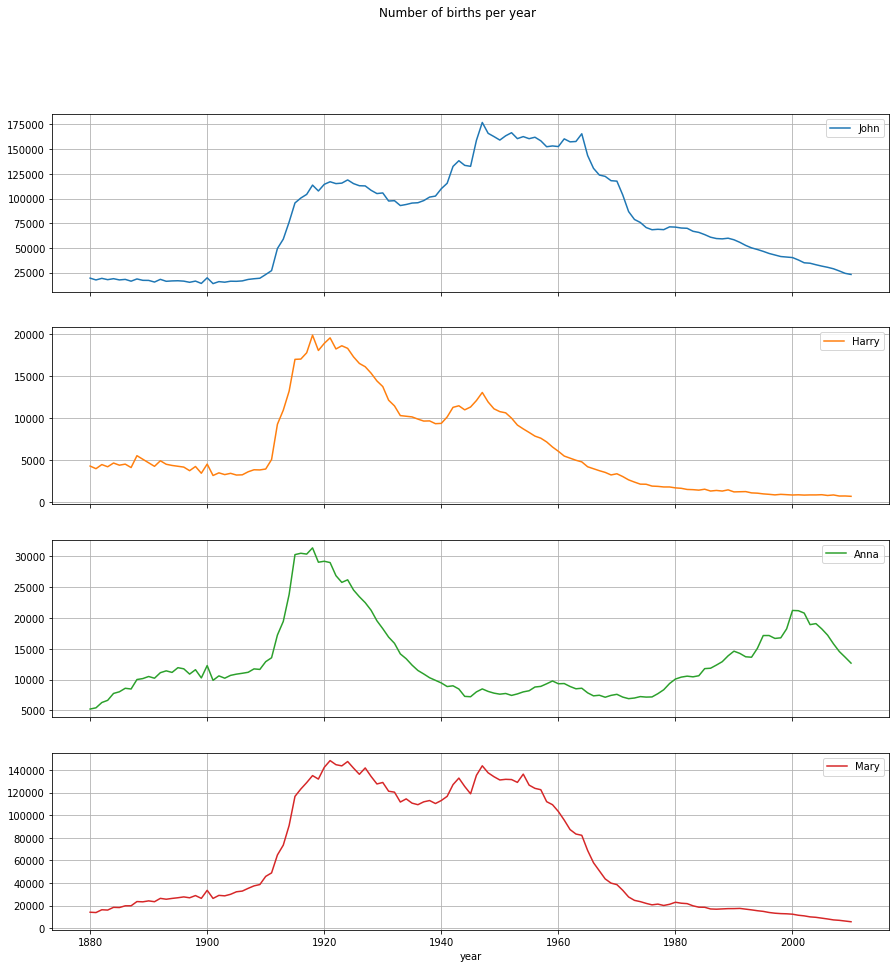

In [44]:
subset = total_births[['John', 'Harry', 'Anna', 'Mary']]

subset.plot(subplots = True, figsize = (15,15), grid = True,
title = "Number of births per year")

### Measuring the increse in naming diversity

<AxesSubplot:title={'center':'sum of table1000.prop by year and sex'}, xlabel='year'>

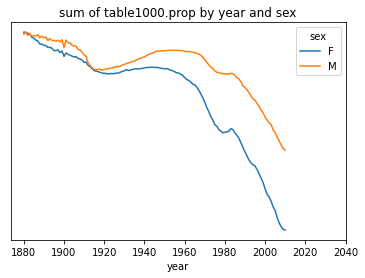

In [57]:
table = top1000.pivot_table('prop', index= 'year', columns= 'sex', aggfunc=sum)

table.plot(title = "sum of table1000.prop by year and sex",yticks= np.linspace(0,1.2,0),  xticks = range(1880, 2060, 20))